In [2]:
import pandas as pd
import numpy as np

In [3]:
data_one = {'A': ['A0', 'A1', 'A2', 'A3'], 'B': ['B0', 'B1', 'B2', 'B3']}

In [4]:
data_two = {'C': ['C0', 'C1', 'C2', 'C3'], 'D': ['D0', 'D1', 'D2', 'D3']}

In [5]:
one = pd.DataFrame(data_one)

In [6]:
two = pd.DataFrame(data_two)

In [7]:
one

,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3


In [8]:
two

,C,D
0,C0,D0
1,C1,D1
2,C2,D2
3,C3,D3


In [9]:
pd.concat([one, two], axis=1)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [10]:
pd.concat([one, two], axis=0)

,A,B,C,D
0,A0,B0,NaN,NaN
1,A1,B1,NaN,NaN
2,A2,B2,NaN,NaN
3,A3,B3,NaN,NaN
0,NaN,NaN,C0,D0
1,NaN,NaN,C1,D1
2,NaN,NaN,C2,D2
3,NaN,NaN,C3,D3


#### suppose you want to concate 2 dataframes along the rows, but the columns are named different but you know by domain knowledge or by asking stakeholders that these columns are same. In such case you do it as follow

In [11]:
one

,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3


In [12]:
two

,C,D
0,C0,D0
1,C1,D1
2,C2,D2
3,C3,D3


In [13]:
two.columns = one.columns

In [14]:
two

,A,B
0,C0,D0
1,C1,D1
2,C2,D2
3,C3,D3


In [15]:
mydf = pd.concat([one, two], axis=0)

In [16]:
mydf

,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3
0,C0,D0
1,C1,D1
2,C2,D2
3,C3,D3


In [17]:
mydf.index = range(len(mydf))

In [18]:
mydf

,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3
4,C0,D0
5,C1,D1
6,C2,D2
7,C3,D3


## Lecture 2

#### Often dataframes are not in the exact same order or format, meaning we cannot simply concatenate them together.
#### In this case, we need to merge the dataframes. 

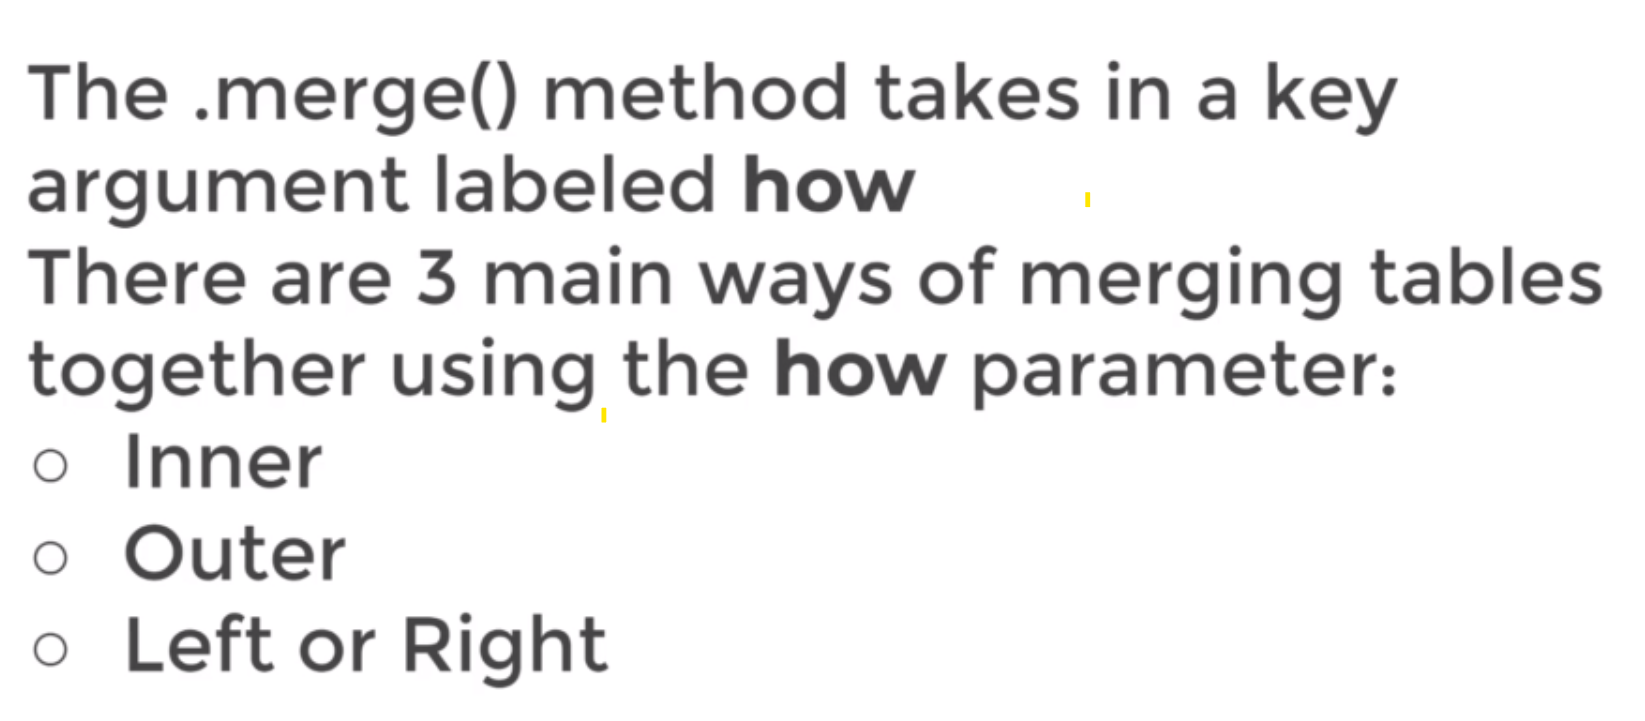

### Inner Join:
* Includes only the matching rows from both DataFrames. 
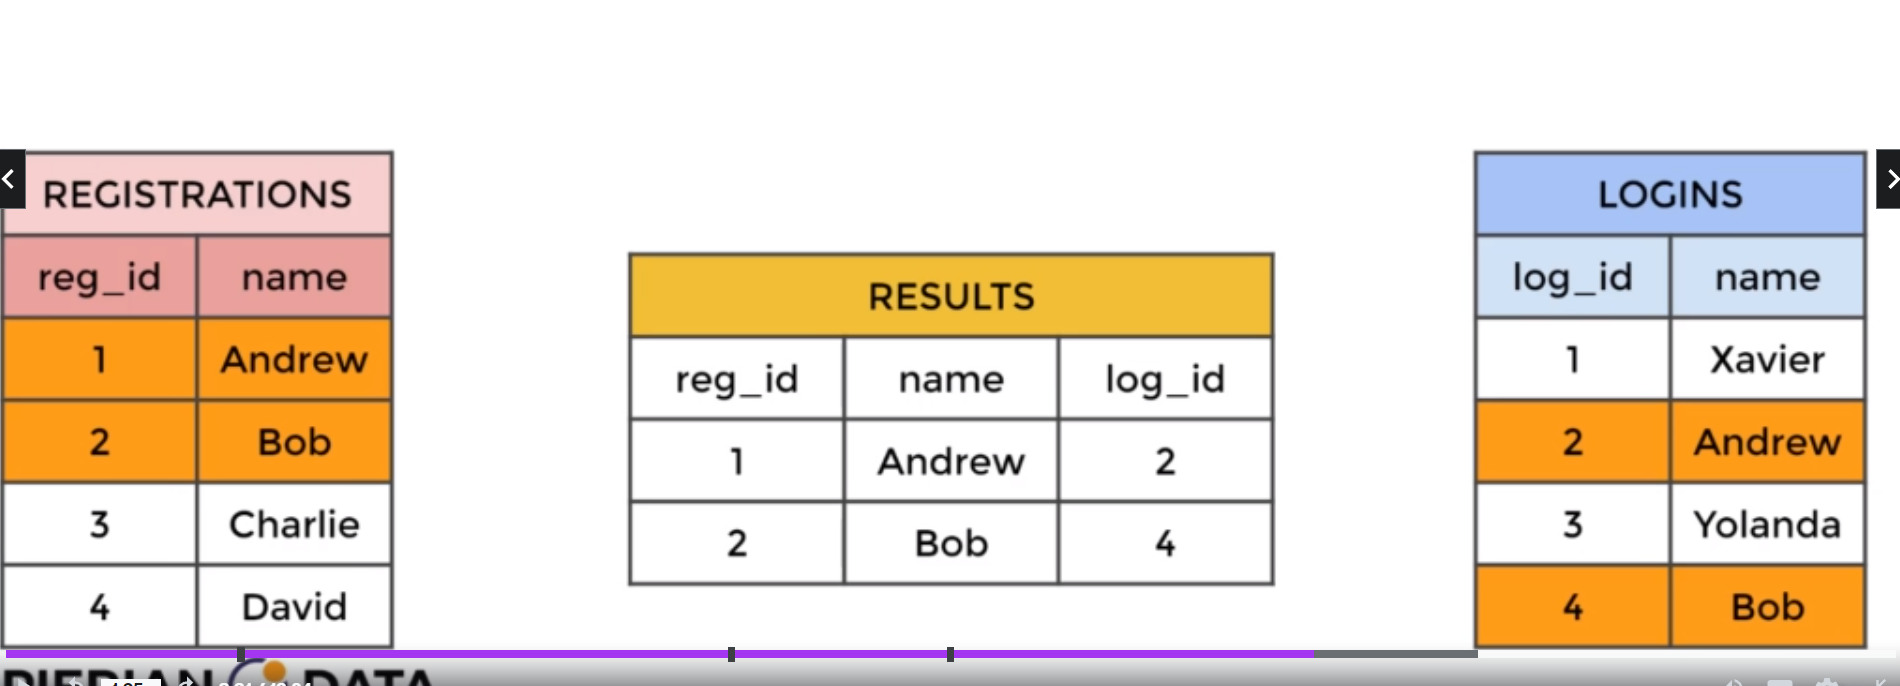

In [19]:
registrations = pd.DataFrame({'reg_id':[1,2,3,4],'name':['Andrew','Bobo','Claire','David']})
logins = pd.DataFrame({'log_id':[1,2,3,4],'name':['Xavier','Andrew','Yolanda','Bobo']})

In [20]:
registrations

,reg_id,name
0,1,Andrew
1,2,Bobo
2,3,Claire
3,4,David


In [21]:
registrations.set_index('reg_id')

,name
reg_id,
1,Andrew
2,Bobo
3,Claire
4,David


In [22]:
logins

,log_id,name
0,1,Xavier
1,2,Andrew
2,3,Yolanda
3,4,Bobo


In [23]:
logins.set_index('log_id')

,name
log_id,
1,Xavier
2,Andrew
3,Yolanda
4,Bobo


In [24]:
logins

,log_id,name
0,1,Xavier
1,2,Andrew
2,3,Yolanda
3,4,Bobo


In [25]:
# help(pd.merge)

In [26]:
Common = pd.merge(registrations, logins, how='inner', on='name')

In [27]:
Common

,reg_id,name,log_id
0,1,Andrew,2
1,2,Bobo,4


#### In case of inner join, the sequnece of dataframes doesn't matter.
#### Note: In other joins it matters

In [28]:
pd.merge(logins, registrations, how='inner', on='name')

,log_id,name,reg_id
0,2,Andrew,1
1,4,Bobo,2


## Left Merge
####  Includes all rows from the left DataFrame and the matching rows from the right DataFrame.
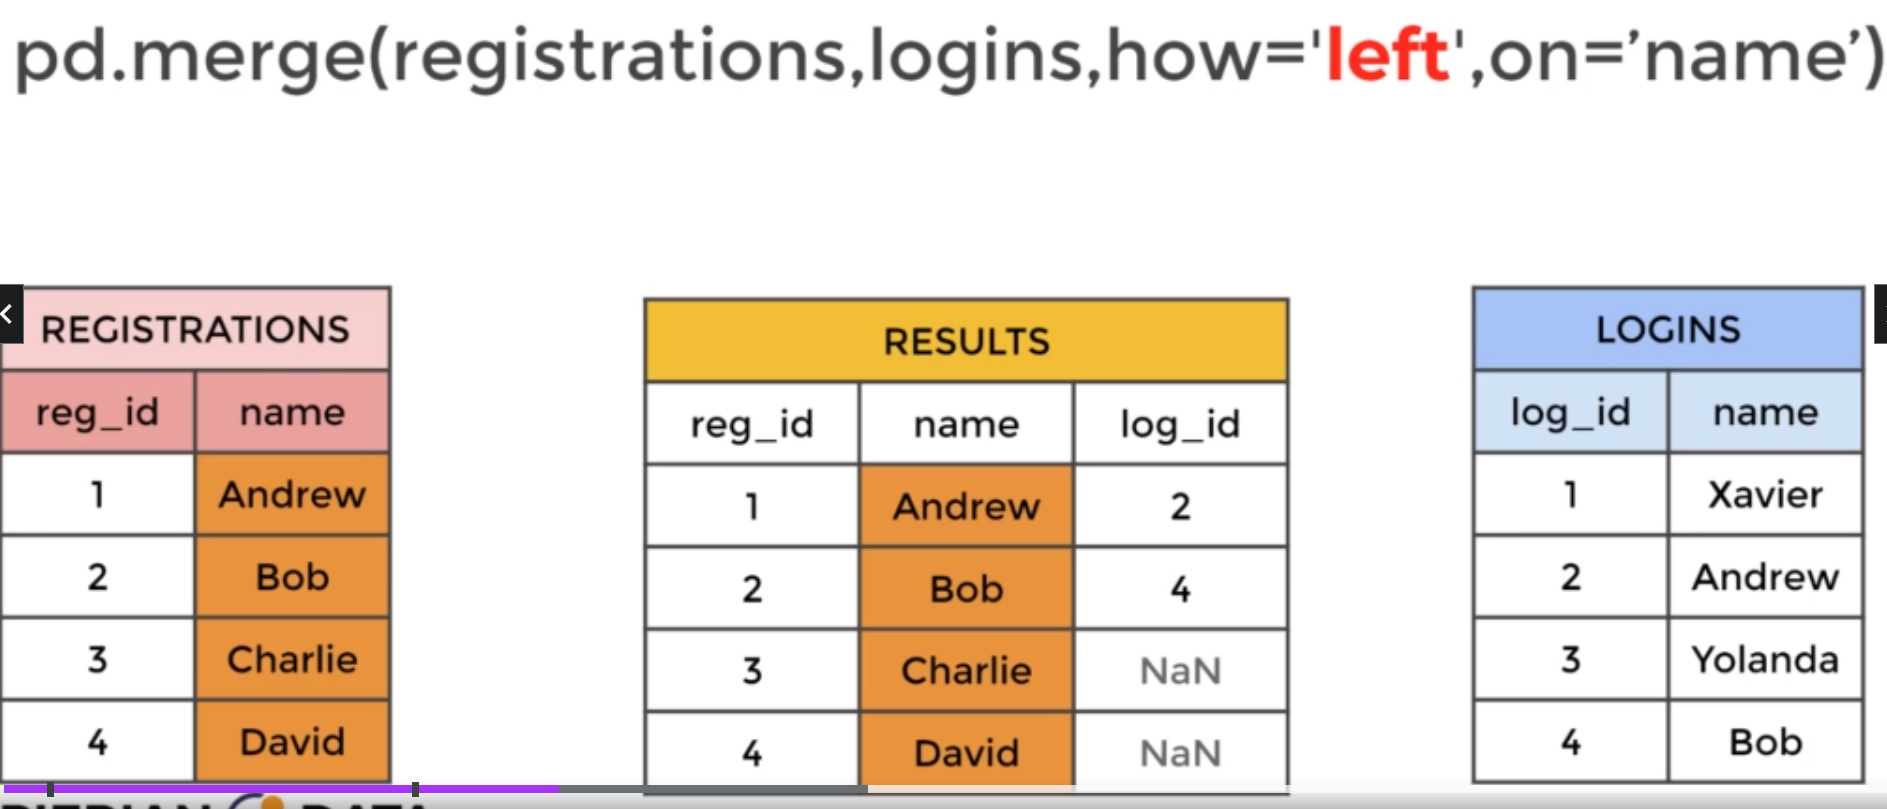

In [29]:
left = pd.merge(registrations, logins, how='left', on='name')

In [30]:
left

,reg_id,name,log_id
0,1,Andrew,2.0
1,2,Bobo,4.0
2,3,Claire,NaN
3,4,David,NaN


## Right Merge:
#### Includes all rows from the right DataFrame and the matching rows from the left DataFrame.

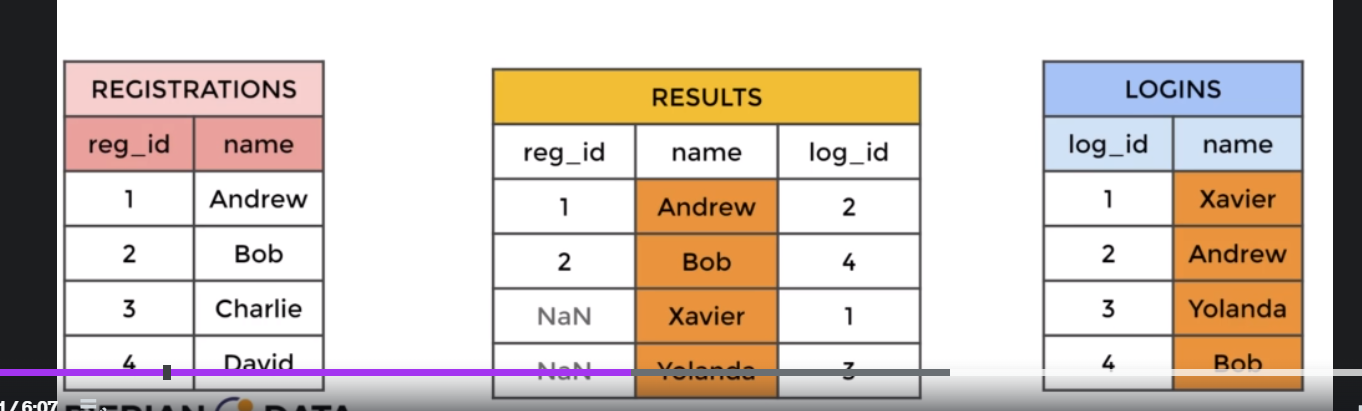

In [31]:
right = pd.merge(registrations, logins, how='right', on='name')

In [32]:
right

,reg_id,name,log_id
0,NaN,Xavier,1
1,1.0,Andrew,2
2,NaN,Yolanda,3
3,2.0,Bobo,4


## Outer Merge
#### It allows us to include everything present in both tables or dataframes.

In [33]:
pd.merge(registrations, logins, how='outer', on='name')

,reg_id,name,log_id
0,1.0,Andrew,2.0
1,2.0,Bobo,4.0
2,3.0,Claire,NaN
3,4.0,David,NaN
4,NaN,Xavier,1.0
5,NaN,Yolanda,3.0


In this case the ordering does not matter because by changing the sequence only the sequence changes

In [34]:
pd.merge(logins, registrations, how='outer', on='name')

,log_id,name,reg_id
0,1.0,Xavier,NaN
1,2.0,Andrew,1.0
2,3.0,Yolanda,NaN
3,4.0,Bobo,2.0
4,NaN,Claire,3.0
5,NaN,David,4.0


### Dealing with differing key column names in joined tables

In [35]:
registrations

,reg_id,name
0,1,Andrew
1,2,Bobo
2,3,Claire
3,4,David


In [36]:
registrations = registrations.set_index('name')

In [37]:
registrations

,reg_id
name,
Andrew,1
Bobo,2
Claire,3
David,4


In [38]:
logins

,log_id,name
0,1,Xavier
1,2,Andrew
2,3,Yolanda
3,4,Bobo


In [39]:
pd.merge(registrations, logins, how='inner', left_index=True, right_on='name')

,reg_id,log_id,name
1,1,2,Andrew
3,2,4,Bobo


In [41]:
registrations = registrations.reset_index()

In [42]:
registrations

,name,reg_id
0,Andrew,1
1,Bobo,2
2,Claire,3
3,David,4


In [43]:
registrations.columns = ['reg_name', 'reg_id']

In [44]:
registrations

,reg_name,reg_id
0,Andrew,1
1,Bobo,2
2,Claire,3
3,David,4


In [45]:
logins

,log_id,name
0,1,Xavier
1,2,Andrew
2,3,Yolanda
3,4,Bobo


In [48]:
result = pd.merge(registrations, logins, how='inner', left_on='reg_name', right_on='name')

In [50]:
result.drop('reg_name', axis=1)

,reg_id,log_id,name
0,1,2,Andrew
1,2,4,Bobo


### Pandas automatically tags duplicate columns

In [51]:
registrations.columns = ['name', 'id']

In [52]:
registrations

,name,id
0,Andrew,1
1,Bobo,2
2,Claire,3
3,David,4


In [55]:
logins.columns = ['id', 'name']

In [56]:
logins

,id,name
0,1,Xavier
1,2,Andrew
2,3,Yolanda
3,4,Bobo


In [57]:
pd.merge(registrations, logins, how='inner', on='name')

,name,id_x,id_y
0,Andrew,1,2
1,Bobo,2,4


In [58]:
pd.merge(registrations, logins, how='inner', on='id')

,name_x,id,name_y
0,Andrew,1,Xavier
1,Bobo,2,Andrew
2,Claire,3,Yolanda
3,David,4,Bobo
